###Leaf Level

In [ ]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Montar o Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ATENÇÃO: Verifique se o caminho para o seu arquivo está correto.
caminho_arquivo = "/content/drive/MyDrive/Doutorado - Ricardo- Após a Qualificação/Paper: EVALUATING LARGE LANGUAGE MODELS FOR AUTOMATED ICD-10 CODING OF OBSTETRIC CLINICAL NOTES IN PORTUGUESE: A COMPARATIVE STUDY/Data/Data_LLMs_and_Gold_and_EHRs.pkl"

try:
    df = pd.read_pickle(caminho_arquivo)
    print("Arquivo carregado com sucesso!")
    print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho especificado. Verifique o caminho:\n{caminho_arquivo}")

# Visualizar as primeiras linhas do DataFrame
if 'df' in locals():
    pd.set_option('display.max_colwidth', 200)
    display(df.head())

Arquivo carregado com sucesso!
O DataFrame tem 1117 linhas e 8 colunas.


,25. Evolução Alta,21. CID de Alta,API Maritalk,API Deep-Seek,API modelo Tunado,API GPT-Mini,API GPT‑4o,API Gemini
0,"PACIENTE DE 34 ANOS, G1, COM DIABETES GESTACIONAL CONTROLADO COM DIETA, HIPOTIREOIDISMO EM USO DE PURAN 25MCG, SURDEZ E MUDISMO, PROCEDENTE DE COSMÓPOLIS, COM SEGUIMENTO DE PRÉ NATAL NA UBS. INTER...","[O42, O80.1, O24.9, E03.9, O22.9]","[O69.0, O68.3, O24.1, E03.9, O82, P07.3, O92.4]","[O42.9, O62.2, O24.4, E03.9, Z37.0, P07.3, D50.9]","[O82.0, O99.1, O26.0, O35.0, O92.0, Z39.0]","[O82, O24.4, E03.9, Z38.0, O66.0, Z39.0]","[O60.1, O72.1, O24.4, E03.9, H91.9, R47.0]","[O42.0, O24.4, E11.9, E03.9, H90.2, D64.9]"
1,"GESTANTE G3A2, COM IG DE 36 SEMANAS + 1 DIA, INTERNA NO DIA 10/03 DEVIDO QUADRO RESPIRATÓRIO AGUDO, COM SUSPEITA DE SEPSE DE FOCO PULMONAR (COVID?). TRATA-SE DE GESTANTE EM SEGUIMENTO NO PNE PG DE...","[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O20.9, Z29.8, K50, M08.3, I80.2, C91.0, F41.2, N39.0, A51.9, B34.2]","[O99.5, J18.9, K50.9, M07.60, I82.90, F41.1, N39.0, A53.9]","[O98.1, O99.0, O35.4, O26.3, O41.1, O32.2, O09.2]","[O80, A41.9, O99.8, I82.9, C91.9, F41.9, N39.0, A54.9]","[O99.5, J18.9, K50.9, M07.6, I82.9, C91.0, F41.1, N39.0, A50.9]","[J22, O99.2, K50, M06.9, I80.2, C91, O36.9, A50.9]"
2,"ANGELICA LAISI BARROS DO NASCIMENTO PACIENTE DE 36 ANOS, G3A2 , SEM COMORBIDADES, PROCEDENTE DE CAMPINAS, COM SEGUIMENTO DE PRÉ NATAL NO PNE- PATOLOGIAS GERAIS. INTERNA EM 31/03 PARA INDUÇÃO DO TR...","[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, O66.9, Z34.9, Z29.8, B50]","[O82, O61.1, Z34.9, Z39.0, A51.4]","[O82.0, O99.0, Z37.0, Z39.0]","[O82, O99.8, Z38.0, O36.8]","[O61.0, O82, Z39.0, Z34.9, A53.9]","[O36.9, O60.0, O09.0, A51.9]"
3,"ELLEN CRISTINA PRADO VIANA PACIENTE DE 33 ANOS,G3P2A0 ,POSSUI RINITE ALÉRGICA + ANEMIA FERROPRIVA, PROCEDENTE DE CAMPINAS-SP, COM SEGUIMENTO DE PRÉ NATAL NA UBS HORTOL NDIA. INTERNA EM DIA 30/03/2...","[O80, J30.4, D50]","[O80, E61.1, J30, E58, O86.0]","[O80, O70.2, J30.9, D50.9, Z39.0]","[O80, O99.0, O99.1, Z39.0, O34.2]","[O80, D50.9, Z34.0, O70.2, R03.0]","[O80, O90.1, J30.1, D50.0]","[O80, D50, J30.1, O84.1]"
4,"PACIENTE G3P2C1, INTERNA NO SERVIÇO COM 30 SEMANAS DE GESTAÇÃO DEVIDO SINTOMAS RESPIRATÓRIOS INICIADO NO INÍCIO DE FEVEREIRO. EM SEGUIMENTO POR RETROVIROSE DESDE 2018 COM TRATAMENTO IRREGULAR. DUR...","[O68.9, B34.2, B24]","[B34.2, O98.7, E64.9, O82, Z01.8]","[O98.5, U07.1, B20, O75.5, O26.9, E87.7]","[O98.7, O98.5, O98.6, O96.0]","[O60.1, B20, O98.5, U07.1, E66.9, O99.3]","[O98.7, B24, U07.1, O99.5, E87.8]","[O36.2, J18.9, J98.8, B20, Z37.0, E86.0]"


In [ ]:
coluna_texto = '25. Evolução Alta'
coluna_ouro = '21. CID de Alta'

colunas_llms = [
    'API Maritalk',
    'API Deep-Seek',
    'API GPT-Mini',
    'API GPT‑4o',
    'API Gemini'
]

print(f"Coluna Padrão-Ouro: '{coluna_ouro}'")
print(f"Colunas dos LLMs: {colunas_llms}")

Coluna Padrão-Ouro: '21. CID de Alta'
Colunas dos LLMs: ['API Maritalk', 'API Deep-Seek', 'API GPT-Mini', 'API GPT‑4o', 'API Gemini']


In [ ]:
def calcular_metricas_por_amostra(preditos, verdadeiros, k=3):
    """Calcula métricas (precision, recall, f1) para uma única amostra (linha)."""
    if not isinstance(preditos, list): preditos = []
    if not isinstance(verdadeiros, list): verdadeiros = []

    preditos_k = set(preditos[:k])
    verdadeiros = set(verdadeiros)

    tp = len(preditos_k & verdadeiros)
    fp = len(preditos_k - verdadeiros)
    fn = len(verdadeiros - preditos_k)

    precisao = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall   = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1       = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0.0

    return precisao, recall, f1, tp, fp, fn


def avaliar_coluna(df, coluna_predicao, coluna_ouro, k=10):
    """Calcula métricas macro e micro para uma coluna de predições inteira."""
    metricas = df.apply(
        lambda row: calcular_metricas_por_amostra(row[coluna_predicao], row[coluna_ouro], k),
        axis=1
    )

    # separa listas
    precs   = [m[0] for m in metricas]
    recalls = [m[1] for m in metricas]
    f1s     = [m[2] for m in metricas]
    tps     = [m[3] for m in metricas]
    fps     = [m[4] for m in metricas]
    fns     = [m[5] for m in metricas]

    # ----- Macro (média das métricas por amostra) -----
    macro_prec = np.mean(precs)
    macro_rec  = np.mean(recalls)
    macro_f1   = np.mean(f1s)

    # ----- Micro (TP/FP/FN globais) -----
    TP, FP, FN = np.sum(tps), np.sum(fps), np.sum(fns)
    micro_prec = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    micro_rec  = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    micro_f1   = 2 * (micro_prec * micro_rec) / (micro_prec + micro_rec) if (micro_prec + micro_rec) > 0 else 0.0

    return {
        "Macro": {"Precision": macro_prec, "Recall": macro_rec, "F1": macro_f1},
        "Micro": {"Precision": micro_prec, "Recall": micro_rec, "F1": micro_f1, "TP": TP, "FP": FP, "FN": FN}
    }

In [ ]:
# Criar novas colunas com o Top-3
for llm in colunas_llms:
    df[f"{llm}_Top3"] = df[llm].apply(lambda x: x[:3] if isinstance(x, list) else [])

# Selecionar para exibir:
# - Ouro (gold standard)
# - Coluna original completa de cada modelo
# - Coluna só com Top-3
cols_to_show = [coluna_ouro]
for llm in colunas_llms:
    cols_to_show.append(llm)            # lista completa
    cols_to_show.append(f"{llm}_Top3")  # top-3

# Mostrar as primeiras linhas
pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())

,21. CID de Alta,API Maritalk,API Maritalk_Top3,API Deep-Seek,API Deep-Seek_Top3,API GPT-Mini,API GPT-Mini_Top3,API GPT‑4o,API GPT‑4o_Top3,API Gemini,API Gemini_Top3
0,"[O42, O80.1, O24.9, E03.9, O22.9]","[O69.0, O68.3, O24.1, E03.9, O82, P07.3, O92.4]","[O69.0, O68.3, O24.1]","[O42.9, O62.2, O24.4, E03.9, Z37.0, P07.3, D50.9]","[O42.9, O62.2, O24.4]","[O82, O24.4, E03.9, Z38.0, O66.0, Z39.0]","[O82, O24.4, E03.9]","[O60.1, O72.1, O24.4, E03.9, H91.9, R47.0]","[O60.1, O72.1, O24.4]","[O42.0, O24.4, E11.9, E03.9, H90.2, D64.9]","[O42.0, O24.4, E11.9]"
1,"[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O20.9, Z29.8, K50, M08.3, I80.2, C91.0, F41.2, N39.0, A51.9, B34.2]","[O20.9, Z29.8, K50]","[O99.5, J18.9, K50.9, M07.60, I82.90, F41.1, N39.0, A53.9]","[O99.5, J18.9, K50.9]","[O80, A41.9, O99.8, I82.9, C91.9, F41.9, N39.0, A54.9]","[O80, A41.9, O99.8]","[O99.5, J18.9, K50.9, M07.6, I82.9, C91.0, F41.1, N39.0, A50.9]","[O99.5, J18.9, K50.9]","[J22, O99.2, K50, M06.9, I80.2, C91, O36.9, A50.9]","[J22, O99.2, K50]"
2,"[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, O66.9, Z34.9, Z29.8, B50]","[O82, O66.9, Z34.9]","[O82, O61.1, Z34.9, Z39.0, A51.4]","[O82, O61.1, Z34.9]","[O82, O99.8, Z38.0, O36.8]","[O82, O99.8, Z38.0]","[O61.0, O82, Z39.0, Z34.9, A53.9]","[O61.0, O82, Z39.0]","[O36.9, O60.0, O09.0, A51.9]","[O36.9, O60.0, O09.0]"
3,"[O80, J30.4, D50]","[O80, E61.1, J30, E58, O86.0]","[O80, E61.1, J30]","[O80, O70.2, J30.9, D50.9, Z39.0]","[O80, O70.2, J30.9]","[O80, D50.9, Z34.0, O70.2, R03.0]","[O80, D50.9, Z34.0]","[O80, O90.1, J30.1, D50.0]","[O80, O90.1, J30.1]","[O80, D50, J30.1, O84.1]","[O80, D50, J30.1]"
4,"[O68.9, B34.2, B24]","[B34.2, O98.7, E64.9, O82, Z01.8]","[B34.2, O98.7, E64.9]","[O98.5, U07.1, B20, O75.5, O26.9, E87.7]","[O98.5, U07.1, B20]","[O60.1, B20, O98.5, U07.1, E66.9, O99.3]","[O60.1, B20, O98.5]","[O98.7, B24, U07.1, O99.5, E87.8]","[O98.7, B24, U07.1]","[O36.2, J18.9, J98.8, B20, Z37.0, E86.0]","[O36.2, J18.9, J98.8]"


In [ ]:


k = 3  # ajuste se quiser outro k

resultados_lista = []
faltando = [c for c in colunas_llms if c not in df.columns]
if faltando:
    print("⚠️ Colunas não encontradas no DataFrame e serão ignoradas:", faltando)

for llm in colunas_llms:
    if llm not in df.columns:
        continue
    res = avaliar_coluna(df, llm, coluna_ouro, k=k)  # usa a versão que retorna {"Macro": {...}, "Micro": {...}}
    resultados_lista.append({
        "Modelo": llm,
        "k": k,
        "Macro_Precision": res["Macro"]["Precision"],
        "Macro_Recall":    res["Macro"]["Recall"],
        "Macro_F1":        res["Macro"]["F1"],
        "Micro_Precision": res["Micro"]["Precision"],
        "Micro_Recall":    res["Micro"]["Recall"],
        "Micro_F1":        res["Micro"]["F1"],
        "TP":              res["Micro"]["TP"],
        "FP":              res["Micro"]["FP"],
        "FN":              res["Micro"]["FN"],
    })

df_resultados_llms = pd.DataFrame(resultados_lista).sort_values(["Macro_F1"], ascending=False).reset_index(drop=True)

print("== Ordenado por Macro_F1 (desc) ==")
display(df_resultados_llms)



== Ordenado por Macro_F1 (desc) ==


,Modelo,k,Macro_Precision,Macro_Recall,Macro_F1,Micro_Precision,Micro_Recall,Micro_F1,TP,FP,FN
0,API Deep-Seek,3,0.165324,0.199246,0.171276,0.165719,0.191034,0.177479,554,2789,2346
1,API GPT-Mini,3,0.139361,0.175885,0.146945,0.139737,0.161034,0.149632,467,2875,2433
2,API GPT‑4o,3,0.133841,0.165547,0.140109,0.134275,0.154138,0.143522,447,2882,2453
3,API Maritalk,3,0.120859,0.162649,0.130809,0.122061,0.139655,0.130267,405,2913,2495
4,API Gemini,3,0.059982,0.081008,0.064865,0.060180,0.069310,0.064423,201,3139,2699


In [ ]:
def agregacao_pluralidade_com_votos(row, colunas_llms):
    votos = Counter()
    for llm in colunas_llms:
        if isinstance(row[llm], list):
            # dá 1 voto por código previsto (como no seu código original)
            votos.update(set(row[llm]))  # se quiser só 1 voto por modelo, use set()
    # retorna lista de tuplas ordenadas: [(codigo, votos), ...]
    return votos.most_common()

# aplica ao DataFrame
df['Agregado_Pluralidade_Votos'] = df.apply(
    agregacao_pluralidade_com_votos, colunas_llms=colunas_llms, axis=1
)

# mostra ouro, predições originais, agregado com votos
cols_to_show = [coluna_ouro] + colunas_llms + ['Agregado_Pluralidade_Votos']

pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())


,21. CID de Alta,API Maritalk,API Deep-Seek,API GPT-Mini,API GPT‑4o,API Gemini,Agregado_Pluralidade_Votos
0,"[O42, O80.1, O24.9, E03.9, O22.9]","[O69.0, O68.3, O24.1, E03.9, O82, P07.3, O92.4]","[O42.9, O62.2, O24.4, E03.9, Z37.0, P07.3, D50.9]","[O82, O24.4, E03.9, Z38.0, O66.0, Z39.0]","[O60.1, O72.1, O24.4, E03.9, H91.9, R47.0]","[O42.0, O24.4, E11.9, E03.9, H90.2, D64.9]","[(E03.9, 5), (O24.4, 4), (O82, 2), (P07.3, 2), (O24.1, 1), (O68.3, 1), (O69.0, 1), (O92.4, 1), (D50.9, 1), (O42.9, 1), (O62.2, 1), (Z37.0, 1), (Z39.0, 1), (Z38.0, 1), (O66.0, 1), (O72.1, 1), (O60...."
1,"[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O20.9, Z29.8, K50, M08.3, I80.2, C91.0, F41.2, N39.0, A51.9, B34.2]","[O99.5, J18.9, K50.9, M07.60, I82.90, F41.1, N39.0, A53.9]","[O80, A41.9, O99.8, I82.9, C91.9, F41.9, N39.0, A54.9]","[O99.5, J18.9, K50.9, M07.6, I82.9, C91.0, F41.1, N39.0, A50.9]","[J22, O99.2, K50, M06.9, I80.2, C91, O36.9, A50.9]","[(N39.0, 4), (C91.0, 2), (K50, 2), (I80.2, 2), (O99.5, 2), (J18.9, 2), (K50.9, 2), (F41.1, 2), (I82.9, 2), (A50.9, 2), (M08.3, 1), (A51.9, 1), (B34.2, 1), (O20.9, 1), (Z29.8, 1), (F41.2, 1), (A53...."
2,"[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, O66.9, Z34.9, Z29.8, B50]","[O82, O61.1, Z34.9, Z39.0, A51.4]","[O82, O99.8, Z38.0, O36.8]","[O61.0, O82, Z39.0, Z34.9, A53.9]","[O36.9, O60.0, O09.0, A51.9]","[(O82, 4), (Z34.9, 3), (Z39.0, 2), (B50, 1), (O66.9, 1), (Z29.8, 1), (O61.1, 1), (A51.4, 1), (O99.8, 1), (O36.8, 1), (Z38.0, 1), (A53.9, 1), (O61.0, 1), (O36.9, 1), (O60.0, 1), (O09.0, 1), (A51.9,..."
3,"[O80, J30.4, D50]","[O80, E61.1, J30, E58, O86.0]","[O80, O70.2, J30.9, D50.9, Z39.0]","[O80, D50.9, Z34.0, O70.2, R03.0]","[O80, O90.1, J30.1, D50.0]","[O80, D50, J30.1, O84.1]","[(O80, 5), (D50.9, 2), (O70.2, 2), (J30.1, 2), (E61.1, 1), (E58, 1), (O86.0, 1), (J30, 1), (J30.9, 1), (Z39.0, 1), (R03.0, 1), (Z34.0, 1), (O90.1, 1), (D50.0, 1), (O84.1, 1), (D50, 1)]"
4,"[O68.9, B34.2, B24]","[B34.2, O98.7, E64.9, O82, Z01.8]","[O98.5, U07.1, B20, O75.5, O26.9, E87.7]","[O60.1, B20, O98.5, U07.1, E66.9, O99.3]","[O98.7, B24, U07.1, O99.5, E87.8]","[O36.2, J18.9, J98.8, B20, Z37.0, E86.0]","[(U07.1, 3), (B20, 3), (O98.7, 2), (O98.5, 2), (Z01.8, 1), (E64.9, 1), (B34.2, 1), (O82, 1), (E87.7, 1), (O75.5, 1), (O26.9, 1), (O60.1, 1), (E66.9, 1), (O99.3, 1), (O99.5, 1), (E87.8, 1), (B24, 1..."


In [ ]:
def agregacao_borda_com_pontos(row, colunas_llms):
    pontos_borda = Counter()
    detalhes = {}  # para guardar quem contribuiu com quanto

    for llm in colunas_llms:
        predicoes = row[llm]
        if not isinstance(predicoes, list):
            continue  # ignora se não for lista

        n = len(predicoes)
        for i, codigo in enumerate(predicoes):
            pontos = n - i  # pontuação decrescente
            pontos_borda[codigo] += pontos
            if codigo not in detalhes:
                detalhes[codigo] = []
            detalhes[codigo].append(f"{llm}:pos{i}(+{pontos})")

    # ranking final de códigos
    codigos_ordenados = [codigo for codigo, _ in pontos_borda.most_common()]

    # cria lista de tuplas [(codigo, pontos, detalhe_por_modelo), ...]
    resultado = [
        (codigo, pontos_borda[codigo], " | ".join(detalhes[codigo]))
        for codigo in codigos_ordenados
    ]

    return resultado

# aplica ao DataFrame
df['Agregado_Borda_Pontos'] = df.apply(
    agregacao_borda_com_pontos, colunas_llms=colunas_llms, axis=1
)

# mostra ouro, predições originais e resultado Borda detalhado
cols_to_show = [coluna_ouro] + colunas_llms + ['Agregado_Borda_Pontos']

pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())


,21. CID de Alta,API Maritalk,API Deep-Seek,API GPT-Mini,API GPT‑4o,API Gemini,Agregado_Borda_Pontos
0,"[O42, O80.1, O24.9, E03.9, O22.9]","[O69.0, O68.3, O24.1, E03.9, O82, P07.3, O92.4]","[O42.9, O62.2, O24.4, E03.9, Z37.0, P07.3, D50.9]","[O82, O24.4, E03.9, Z38.0, O66.0, Z39.0]","[O60.1, O72.1, O24.4, E03.9, H91.9, R47.0]","[O42.0, O24.4, E11.9, E03.9, H90.2, D64.9]","[(O24.4, 19, API Deep-Seek:pos2(+5) | API GPT-Mini:pos1(+5) | API GPT‑4o:pos2(+4) | API Gemini:pos1(+5)), (E03.9, 18, API Maritalk:pos3(+4) | API Deep-Seek:pos3(+4) | API GPT-Mini:pos2(+4) | API G..."
1,"[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O20.9, Z29.8, K50, M08.3, I80.2, C91.0, F41.2, N39.0, A51.9, B34.2]","[O99.5, J18.9, K50.9, M07.60, I82.90, F41.1, N39.0, A53.9]","[O80, A41.9, O99.8, I82.9, C91.9, F41.9, N39.0, A54.9]","[O99.5, J18.9, K50.9, M07.6, I82.9, C91.0, F41.1, N39.0, A50.9]","[J22, O99.2, K50, M06.9, I80.2, C91, O36.9, A50.9]","[(O99.5, 17, API Deep-Seek:pos0(+8) | API GPT‑4o:pos0(+9)), (J18.9, 15, API Deep-Seek:pos1(+7) | API GPT‑4o:pos1(+8)), (K50, 14, API Maritalk:pos2(+8) | API Gemini:pos2(+6)), (K50.9, 13, API Deep-..."
2,"[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, O66.9, Z34.9, Z29.8, B50]","[O82, O61.1, Z34.9, Z39.0, A51.4]","[O82, O99.8, Z38.0, O36.8]","[O61.0, O82, Z39.0, Z34.9, A53.9]","[O36.9, O60.0, O09.0, A51.9]","[(O82, 18, API Maritalk:pos0(+5) | API Deep-Seek:pos0(+5) | API GPT-Mini:pos0(+4) | API GPT‑4o:pos1(+4)), (Z34.9, 8, API Maritalk:pos2(+3) | API Deep-Seek:pos2(+3) | API GPT‑4o:pos3(+2)), (Z39.0, ..."
3,"[O80, J30.4, D50]","[O80, E61.1, J30, E58, O86.0]","[O80, O70.2, J30.9, D50.9, Z39.0]","[O80, D50.9, Z34.0, O70.2, R03.0]","[O80, O90.1, J30.1, D50.0]","[O80, D50, J30.1, O84.1]","[(O80, 23, API Maritalk:pos0(+5) | API Deep-Seek:pos0(+5) | API GPT-Mini:pos0(+5) | API GPT‑4o:pos0(+4) | API Gemini:pos0(+4)), (O70.2, 6, API Deep-Seek:pos1(+4) | API GPT-Mini:pos3(+2)), (D50.9, ..."
4,"[O68.9, B34.2, B24]","[B34.2, O98.7, E64.9, O82, Z01.8]","[O98.5, U07.1, B20, O75.5, O26.9, E87.7]","[O60.1, B20, O98.5, U07.1, E66.9, O99.3]","[O98.7, B24, U07.1, O99.5, E87.8]","[O36.2, J18.9, J98.8, B20, Z37.0, E86.0]","[(B20, 12, API Deep-Seek:pos2(+4) | API GPT-Mini:pos1(+5) | API Gemini:pos3(+3)), (U07.1, 11, API Deep-Seek:pos1(+5) | API GPT-Mini:pos3(+3) | API GPT‑4o:pos2(+3)), (O98.5, 10, API Deep-Seek:pos0(..."


In [ ]:

from collections import Counter, defaultdict
import pandas as pd

def agregacao_borda(row, colunas_llms):
    """Retorna lista de códigos ordenados pela pontuação Borda (sem detalhar)."""
    pontos_borda = Counter()
    for llm in colunas_llms:
        predicoes = row.get(llm, None)
        if not isinstance(predicoes, list):
            continue
        n = len(predicoes)
        for i, codigo in enumerate(predicoes):
            pontos_borda[codigo] += (n - i)  # n, n-1, n-2, ...
    return [cod for cod, _ in pontos_borda.most_common()]

def agregacao_borda_com_pontos(row, colunas_llms):
    """
    Retorna lista de tuplas ordenadas:
      [(codigo, score_total, "LLM1:pos0(+N) | LLM2:pos3(+M) | ..."), ...]
    """
    score = Counter()
    detalhe = defaultdict(list)
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        n = len(preds)
        for pos, codigo in enumerate(preds):
            pts = n - pos
            score[codigo] += pts
            detalhe[codigo].append(f"{llm}:pos{pos}(+{pts})")
    ordenado = [c for c, _ in score.most_common()]
    return [(c, score[c], " | ".join(sorted(detalhe[c]))) for c in ordenado]

# --- garante colunas do Borda ---
if 'Agregado_Borda' not in df.columns:
    df['Agregado_Borda'] = df.apply(agregacao_borda, colunas_llms=colunas_llms, axis=1)

df['Agregado_Borda_Pontos'] = df.apply(agregacao_borda_com_pontos, colunas_llms=colunas_llms, axis=1)

# --- visualização rápida (primeiras 5 linhas) ---
def _topk_list(x, k):
    return x[:k] if isinstance(x, list) else []

k_vis = 3  # top-k para exibir
pd.set_option("display.max_colwidth", 200)

# monta uma tabela compacta com Top-k de Borda + scores
def _linha_resumo(row, k=k_vis):
    # top-k “simples”
    topk_borda = _topk_list(row['Agregado_Borda'], k)
    # top-k detalhado com scores
    detalhados = row['Agregado_Borda_Pontos'][:k] if isinstance(row['Agregado_Borda_Pontos'], list) else []
    # string amigável: COD(score) separados por vírgula
    topk_score_str = ", ".join([f"{c}({s})" for c, s, _ in detalhados])
    return pd.Series({
        "Ouro": row[coluna_ouro],
        f"Borda_Top{k}": topk_borda,
        f"Borda_Top{k}_comScores": topk_score_str
    })

resumo_borda = df.apply(_linha_resumo, axis=1)
print("== Borda: Top-k e pontuações (amostras iniciais) ==")
display(resumo_borda.head(5))

# --- função para inspecionar um caso específico com todo o detalhe ---
def detalhar_borda(idx, k=5):
    """
    Mostra na tela:
      - Ouro (linha idx)
      - Top-k do Borda (códigos)
      - Tabela detalhada com (Codigo, Score, Contribuicoes por modelo)
    """
    if idx not in df.index:
        print(f"Índice {idx} não existe no DataFrame."); return
    ouro = df.loc[idx, coluna_ouro]
    detalhados = df.loc[idx, 'Agregado_Borda_Pontos']
    topk = [c for c, _, _ in (detalhados[:k] if isinstance(detalhados, list) else [])]

    print(f"\n=== Detalhe Borda — idx={idx} — k={k} ===")
    print("OURO:", ", ".join(ouro) if isinstance(ouro, list) else ouro)
    print("Top-k (códigos):", ", ".join(topk))

    # tabela longa com todos os códigos
    linhas = [{"Codigo": c, "Score": s, "Contribuicoes": contrib} for (c, s, contrib) in (detalhados or [])]
    df_det = pd.DataFrame(linhas)
    display(df_det)


== Borda: Top-k e pontuações (amostras iniciais) ==


,Ouro,Borda_Top3,Borda_Top3_comScores
0,"[O42, O80.1, O24.9, E03.9, O22.9]","[O24.4, E03.9, O82]","O24.4(19), E03.9(18), O82(9)"
1,"[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O99.5, J18.9, K50]","O99.5(17), J18.9(15), K50(14)"
2,"[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, Z34.9, Z39.0]","O82(18), Z34.9(8), Z39.0(5)"
3,"[O80, J30.4, D50]","[O80, O70.2, D50.9]","O80(23), O70.2(6), D50.9(6)"
4,"[O68.9, B34.2, B24]","[B20, U07.1, O98.5]","B20(12), U07.1(11), O98.5(10)"


In [ ]:
# ============================================
# DETALHES DA PLURALIDADE: votos e quem votou
# ============================================

from collections import Counter, defaultdict
import pandas as pd

def agregacao_pluralidade(row, colunas_llms, one_vote_per_model=True):
    """
    Retorna lista de códigos ordenados por nº de votos (maior→menor).
    one_vote_per_model=True => cada modelo dá no máx. 1 voto por código.
    """
    votos = Counter()
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        fonte = set(preds) if one_vote_per_model else preds
        votos.update(fonte)
    # apenas códigos, ordenados por contagem
    return [cod for cod, _ in votos.most_common()]

def agregacao_pluralidade_com_votos(row, colunas_llms, one_vote_per_model=True):
    """
    Retorna lista de tuplas ordenadas:
      [(codigo, votos, "LLM1 | LLM2 | ..."), ...]
    Mostra também quem votou em cada código.
    """
    votos = Counter()
    quem = defaultdict(set)  # código -> {modelos}
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        fonte = set(preds) if one_vote_per_model else preds
        # contabiliza e registra fonte do voto
        if one_vote_per_model:
            for c in fonte:
                votos[c] += 1
                quem[c].add(llm)
        else:
            for c in fonte:
                votos[c] += 1
                quem[c].add(llm)
    ordenado = [c for c,_ in votos.most_common()]
    return [(c, votos[c], " | ".join(sorted(quem[c]))) for c in ordenado]

# --- garante colunas da Pluralidade ---
if 'Agregado_Pluralidade' not in df.columns:
    df['Agregado_Pluralidade'] = df.apply(
        agregacao_pluralidade, colunas_llms=colunas_llms, axis=1
    )

df['Agregado_Pluralidade_Votos'] = df.apply(
    agregacao_pluralidade_com_votos, colunas_llms=colunas_llms, axis=1
)

# --- visualização rápida (primeiras 5 linhas) ---
def _topk_list(x, k):
    return x[:k] if isinstance(x, list) else []

k_vis = 3  # top-k para exibir
pd.set_option("display.max_colwidth", 200)

def _linha_resumo_pluralidade(row, k=k_vis):
    topk_plural = _topk_list(row['Agregado_Pluralidade'], k)
    detalhados  = row['Agregado_Pluralidade_Votos'][:k] if isinstance(row['Agregado_Pluralidade_Votos'], list) else []
    # string do tipo COD(votos)
    topk_votes_str = ", ".join([f"{c}({v})" for c, v, _ in detalhados])
    return pd.Series({
        "Ouro": row[coluna_ouro],
        f"Pluralidade_Top{k}": topk_plural,
        f"Pluralidade_Top{k}_comVotos": topk_votes_str
    })

resumo_plural = df.apply(_linha_resumo_pluralidade, axis=1)
print("== Pluralidade: Top-k e votos (amostras iniciais) ==")
display(resumo_plural.head(5))

# --- função para inspecionar um caso específico com todo o detalhe ---
def detalhar_pluralidade(idx, k=5):
    """
    Mostra:
      - Ouro (linha idx)
      - Top-k do Pluralidade (códigos)
      - Tabela detalhada com (Codigo, Votos, Quem_Votou)
    """
    if idx not in df.index:
        print(f"Índice {idx} não existe no DataFrame."); return
    ouro = df.loc[idx, coluna_ouro]
    detalhados = df.loc[idx, 'Agregado_Pluralidade_Votos']
    topk = [c for c, _, _ in (detalhados[:k] if isinstance(detalhados, list) else [])]

    print(f"\n=== Detalhe Pluralidade — idx={idx} — k={k} ===")
    print("OURO:", ", ".join(ouro) if isinstance(ouro, list) else ouro)
    print("Top-k (códigos):", ", ".join(topk))

    linhas = [{"Codigo": c, "Votos": v, "Quem_Votou": quem} for (c, v, quem) in (detalhados or [])]
    df_det = pd.DataFrame(linhas)
    display(df_det)



== Pluralidade: Top-k e votos (amostras iniciais) ==


,Ouro,Pluralidade_Top3,Pluralidade_Top3_comVotos
0,"[O42, O80.1, O24.9, E03.9, O22.9]","[E03.9, O24.4, O82]","E03.9(5), O24.4(4), O82(2)"
1,"[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[N39.0, C91.0, K50]","N39.0(4), C91.0(2), K50(2)"
2,"[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, Z34.9, Z39.0]","O82(4), Z34.9(3), Z39.0(2)"
3,"[O80, J30.4, D50]","[O80, D50.9, O70.2]","O80(5), D50.9(2), O70.2(2)"
4,"[O68.9, B34.2, B24]","[U07.1, B20, O98.7]","U07.1(3), B20(3), O98.7(2)"


In [ ]:

import numpy as np
import pandas as pd

# ---------- util: métricas por amostra + micro agregadas ----------
def _metricas_por_amostra(preditos, verdadeiros, k=3):
    """Retorna (prec, rec, f1, tp, fp, fn) para UMA linha."""
    if not isinstance(preditos, list): preditos = []
    if not isinstance(verdadeiros, list): verdadeiros = []
    yp = set(preditos[:k])
    yt = set(verdadeiros)
    tp = len(yp & yt)
    fp = len(yp - yt)
    fn = len(yt - yp)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1   = 2*prec*rec/(prec+rec) if (prec+rec) > 0 else 0.0
    return prec, rec, f1, tp, fp, fn

def _avaliar_macro_micro(df, col_pred, col_true, k=3):
    """Calcula Macro (média por amostra) e Micro (TP/FP/FN globais) para uma coluna de predição."""
    if col_pred not in df.columns:
        raise KeyError(f"Coluna '{col_pred}' não existe no DataFrame.")
    metricas = df.apply(lambda r: _metricas_por_amostra(r[col_pred], r[col_true], k), axis=1)
    precs   = [m[0] for m in metricas]
    recs    = [m[1] for m in metricas]
    f1s     = [m[2] for m in metricas]
    tps     = [m[3] for m in metricas]
    fps     = [m[4] for m in metricas]
    fns     = [m[5] for m in metricas]
    # Macro
    macro_p = float(np.mean(precs))
    macro_r = float(np.mean(recs))
    macro_f = float(np.mean(f1s))
    # Micro
    TP, FP, FN = int(np.sum(tps)), int(np.sum(fps)), int(np.sum(fns))
    micro_p = TP/(TP+FP) if (TP+FP)>0 else 0.0
    micro_r = TP/(TP+FN) if (TP+FN)>0 else 0.0
    micro_f = 2*micro_p*micro_r/(micro_p+micro_r) if (micro_p+micro_r)>0 else 0.0
    return {
        "Macro_Precision": macro_p, "Macro_Recall": macro_r, "Macro_F1": macro_f,
        "Micro_Precision": micro_p, "Micro_Recall": micro_r, "Micro_F1": micro_f,
        "TP": TP, "FP": FP, "FN": FN
    }

# ---------- alvo: todos os modelos + ensembles (quando existirem) ----------
candidatos = list(colunas_llms)
for extra in ["Agregado_Pluralidade", "Agregado_Borda"]:
    if extra in df.columns:
        candidatos.append(extra)

faltando = [c for c in candidatos if c not in df.columns]
if faltando:
    print("⚠️ Colunas ausentes e ignoradas:", faltando)
    candidatos = [c for c in candidatos if c in df.columns]

# ---------- calcular e montar DataFrame resumo ----------
linhas = []
for col in candidatos:
    res = _avaliar_macro_micro(df, col, coluna_ouro, k=k)
    linhas.append({
        "Modelo": col, "k": k,
        **res
    })

df_resultados_final = pd.DataFrame(linhas)

print("== Ordenado por Macro_F1 (desc) ==")
display(df_resultados_final.sort_values("Micro_F1", ascending=False).reset_index(drop=True))




== Ordenado por Macro_F1 (desc) ==


,Modelo,k,Macro_Precision,Macro_Recall,Macro_F1,Micro_Precision,Micro_Recall,Micro_F1,TP,FP,FN
0,Agregado_Borda,3,0.185915,0.227089,0.193243,0.185915,0.214828,0.199328,623,2728,2277
1,Agregado_Pluralidade,3,0.178753,0.215071,0.184003,0.178753,0.206552,0.191649,599,2752,2301
2,API Deep-Seek,3,0.165324,0.199246,0.171276,0.165719,0.191034,0.177479,554,2789,2346
3,API GPT-Mini,3,0.139361,0.175885,0.146945,0.139737,0.161034,0.149632,467,2875,2433
4,API GPT‑4o,3,0.133841,0.165547,0.140109,0.134275,0.154138,0.143522,447,2882,2453
5,API Maritalk,3,0.120859,0.162649,0.130809,0.122061,0.139655,0.130267,405,2913,2495
6,API Gemini,3,0.059982,0.081008,0.064865,0.060180,0.069310,0.064423,201,3139,2699


###Três Caracteres

In [ ]:
# ATENÇÃO: Verifique se o caminho para o seu arquivo está correto.
caminho_arquivo = "/content/drive/MyDrive/Doutorado - Ricardo- Após a Qualificação/Paper: EVALUATING LARGE LANGUAGE MODELS FOR AUTOMATED ICD-10 CODING OF OBSTETRIC CLINICAL NOTES IN PORTUGUESE: A COMPARATIVE STUDY/Data/Data_LLMs_and_Gold_and_EHRs.pkl"

try:
    df = pd.read_pickle(caminho_arquivo)
    print("Arquivo carregado com sucesso!")
    print(f"O DataFrame tem {df.shape[0]} linhas e {df.shape[1]} colunas.")
except FileNotFoundError:
    print(f"Erro: Arquivo não encontrado no caminho especificado. Verifique o caminho:\n{caminho_arquivo}")

# Visualizar as primeiras linhas do DataFrame
if 'df' in locals():
    pd.set_option('display.max_colwidth', 200)
    display(df.head())

Arquivo carregado com sucesso!
O DataFrame tem 1117 linhas e 8 colunas.


,25. Evolução Alta,21. CID de Alta,API Maritalk,API Deep-Seek,API modelo Tunado,API GPT-Mini,API GPT‑4o,API Gemini
0,"PACIENTE DE 34 ANOS, G1, COM DIABETES GESTACIONAL CONTROLADO COM DIETA, HIPOTIREOIDISMO EM USO DE PURAN 25MCG, SURDEZ E MUDISMO, PROCEDENTE DE COSMÓPOLIS, COM SEGUIMENTO DE PRÉ NATAL NA UBS. INTER...","[O42, O80.1, O24.9, E03.9, O22.9]","[O69.0, O68.3, O24.1, E03.9, O82, P07.3, O92.4]","[O42.9, O62.2, O24.4, E03.9, Z37.0, P07.3, D50.9]","[O82.0, O99.1, O26.0, O35.0, O92.0, Z39.0]","[O82, O24.4, E03.9, Z38.0, O66.0, Z39.0]","[O60.1, O72.1, O24.4, E03.9, H91.9, R47.0]","[O42.0, O24.4, E11.9, E03.9, H90.2, D64.9]"
1,"GESTANTE G3A2, COM IG DE 36 SEMANAS + 1 DIA, INTERNA NO DIA 10/03 DEVIDO QUADRO RESPIRATÓRIO AGUDO, COM SUSPEITA DE SEPSE DE FOCO PULMONAR (COVID?). TRATA-SE DE GESTANTE EM SEGUIMENTO NO PNE PG DE...","[K50.9, I82.9, C91.9, F41.1, N39.9, A41.9, Z35.9, J45.9]","[O20.9, Z29.8, K50, M08.3, I80.2, C91.0, F41.2, N39.0, A51.9, B34.2]","[O99.5, J18.9, K50.9, M07.60, I82.90, F41.1, N39.0, A53.9]","[O98.1, O99.0, O35.4, O26.3, O41.1, O32.2, O09.2]","[O80, A41.9, O99.8, I82.9, C91.9, F41.9, N39.0, A54.9]","[O99.5, J18.9, K50.9, M07.6, I82.9, C91.0, F41.1, N39.0, A50.9]","[J22, O99.2, K50, M06.9, I80.2, C91, O36.9, A50.9]"
2,"ANGELICA LAISI BARROS DO NASCIMENTO PACIENTE DE 36 ANOS, G3A2 , SEM COMORBIDADES, PROCEDENTE DE CAMPINAS, COM SEGUIMENTO DE PRÉ NATAL NO PNE- PATOLOGIAS GERAIS. INTERNA EM 31/03 PARA INDUÇÃO DO TR...","[K50.9, I82.9, C91.9, F41.1, N39.9, O82.0]","[O82, O66.9, Z34.9, Z29.8, B50]","[O82, O61.1, Z34.9, Z39.0, A51.4]","[O82.0, O99.0, Z37.0, Z39.0]","[O82, O99.8, Z38.0, O36.8]","[O61.0, O82, Z39.0, Z34.9, A53.9]","[O36.9, O60.0, O09.0, A51.9]"
3,"ELLEN CRISTINA PRADO VIANA PACIENTE DE 33 ANOS,G3P2A0 ,POSSUI RINITE ALÉRGICA + ANEMIA FERROPRIVA, PROCEDENTE DE CAMPINAS-SP, COM SEGUIMENTO DE PRÉ NATAL NA UBS HORTOL NDIA. INTERNA EM DIA 30/03/2...","[O80, J30.4, D50]","[O80, E61.1, J30, E58, O86.0]","[O80, O70.2, J30.9, D50.9, Z39.0]","[O80, O99.0, O99.1, Z39.0, O34.2]","[O80, D50.9, Z34.0, O70.2, R03.0]","[O80, O90.1, J30.1, D50.0]","[O80, D50, J30.1, O84.1]"
4,"PACIENTE G3P2C1, INTERNA NO SERVIÇO COM 30 SEMANAS DE GESTAÇÃO DEVIDO SINTOMAS RESPIRATÓRIOS INICIADO NO INÍCIO DE FEVEREIRO. EM SEGUIMENTO POR RETROVIROSE DESDE 2018 COM TRATAMENTO IRREGULAR. DUR...","[O68.9, B34.2, B24]","[B34.2, O98.7, E64.9, O82, Z01.8]","[O98.5, U07.1, B20, O75.5, O26.9, E87.7]","[O98.7, O98.5, O98.6, O96.0]","[O60.1, B20, O98.5, U07.1, E66.9, O99.3]","[O98.7, B24, U07.1, O99.5, E87.8]","[O36.2, J18.9, J98.8, B20, Z37.0, E86.0]"


In [ ]:
coluna_texto = '25. Evolução Alta'
coluna_ouro = '21. CID de Alta'

colunas_llms = [
    'API Maritalk',
    'API Deep-Seek',
    'API GPT-Mini',
    'API GPT‑4o',
    'API Gemini'
]

print(f"Coluna Padrão-Ouro: '{coluna_ouro}'")
print(f"Colunas dos LLMs: {colunas_llms}")

Coluna Padrão-Ouro: '21. CID de Alta'
Colunas dos LLMs: ['API Maritalk', 'API Deep-Seek', 'API GPT-Mini', 'API GPT‑4o', 'API Gemini']


In [ ]:
import re

def truncar_para_3chars(codigos):
    """
    Recebe lista de CIDs e devolve só os 3 primeiros caracteres (letra + 2 dígitos).
    Ex.: ['O42.9', 'E03.9', 'K50.91'] -> ['O42', 'E03', 'K50']
    """
    if not isinstance(codigos, list):
        return []
    truncados = []
    for c in codigos:
        if isinstance(c, str):
            m = re.match(r'^[A-Z]\d{2}', c)  # captura padrão tipo O42, E03, K50
            if m:
                truncados.append(m.group(0))
    return truncados

# aplica em coluna_ouro e colunas_llms
cols_para_truncar = [coluna_ouro] + colunas_llms
df[cols_para_truncar] = df[cols_para_truncar].applymap(truncar_para_3chars)


display(df[[coluna_ouro] + colunas_llms].head())

/tmp/ipython-input-3413466574.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[cols_para_truncar] = df[cols_para_truncar].applymap(truncar_para_3chars)


,21. CID de Alta,API Maritalk,API Deep-Seek,API GPT-Mini,API GPT‑4o,API Gemini
0,"[O42, O80, O24, E03, O22]","[O69, O68, O24, E03, O82, P07, O92]","[O42, O62, O24, E03, Z37, P07, D50]","[O82, O24, E03, Z38, O66, Z39]","[O60, O72, O24, E03, H91, R47]","[O42, O24, E11, E03, H90, D64]"
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[O20, Z29, K50, M08, I80, C91, F41, N39, A51, B34]","[O99, J18, K50, M07, I82, F41, N39, A53]","[O80, A41, O99, I82, C91, F41, N39, A54]","[O99, J18, K50, M07, I82, C91, F41, N39, A50]","[J22, O99, K50, M06, I80, C91, O36, A50]"
2,"[K50, I82, C91, F41, N39, O82]","[O82, O66, Z34, Z29, B50]","[O82, O61, Z34, Z39, A51]","[O82, O99, Z38, O36]","[O61, O82, Z39, Z34, A53]","[O36, O60, O09, A51]"
3,"[O80, J30, D50]","[O80, E61, J30, E58, O86]","[O80, O70, J30, D50, Z39]","[O80, D50, Z34, O70, R03]","[O80, O90, J30, D50]","[O80, D50, J30, O84]"
4,"[O68, B34, B24]","[B34, O98, E64, O82, Z01]","[O98, U07, B20, O75, O26, E87]","[O60, B20, O98, U07, E66, O99]","[O98, B24, U07, O99, E87]","[O36, J18, J98, B20, Z37, E86]"


In [ ]:
def calcular_metricas_por_amostra(preditos, verdadeiros, k=3):
    """Calcula métricas (precision, recall, f1) para uma única amostra (linha)."""
    if not isinstance(preditos, list): preditos = []
    if not isinstance(verdadeiros, list): verdadeiros = []

    preditos_k = set(preditos[:k])
    verdadeiros = set(verdadeiros)

    tp = len(preditos_k & verdadeiros)
    fp = len(preditos_k - verdadeiros)
    fn = len(verdadeiros - preditos_k)

    precisao = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall   = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1       = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0.0

    return precisao, recall, f1, tp, fp, fn


def avaliar_coluna(df, coluna_predicao, coluna_ouro, k=10):
    """Calcula métricas macro e micro para uma coluna de predições inteira."""
    metricas = df.apply(
        lambda row: calcular_metricas_por_amostra(row[coluna_predicao], row[coluna_ouro], k),
        axis=1
    )

    # separa listas
    precs   = [m[0] for m in metricas]
    recalls = [m[1] for m in metricas]
    f1s     = [m[2] for m in metricas]
    tps     = [m[3] for m in metricas]
    fps     = [m[4] for m in metricas]
    fns     = [m[5] for m in metricas]

    # ----- Macro (média das métricas por amostra) -----
    macro_prec = np.mean(precs)
    macro_rec  = np.mean(recalls)
    macro_f1   = np.mean(f1s)

    # ----- Micro (TP/FP/FN globais) -----
    TP, FP, FN = np.sum(tps), np.sum(fps), np.sum(fns)
    micro_prec = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    micro_rec  = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    micro_f1   = 2 * (micro_prec * micro_rec) / (micro_prec + micro_rec) if (micro_prec + micro_rec) > 0 else 0.0

    return {
        "Macro": {"Precision": macro_prec, "Recall": macro_rec, "F1": macro_f1},
        "Micro": {"Precision": micro_prec, "Recall": micro_rec, "F1": micro_f1, "TP": TP, "FP": FP, "FN": FN}
    }

In [ ]:
# Criar novas colunas com o Top-3
for llm in colunas_llms:
    df[f"{llm}_Top3"] = df[llm].apply(lambda x: x[:3] if isinstance(x, list) else [])

# Selecionar para exibir:
# - Ouro (gold standard)
# - Coluna original completa de cada modelo
# - Coluna só com Top-3
cols_to_show = [coluna_ouro]
for llm in colunas_llms:
    cols_to_show.append(llm)            # lista completa
    cols_to_show.append(f"{llm}_Top3")  # top-3

# Mostrar as primeiras linhas
pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())

,21. CID de Alta,API Maritalk,API Maritalk_Top3,API Deep-Seek,API Deep-Seek_Top3,API GPT-Mini,API GPT-Mini_Top3,API GPT‑4o,API GPT‑4o_Top3,API Gemini,API Gemini_Top3
0,"[O42, O80, O24, E03, O22]","[O69, O68, O24, E03, O82, P07, O92]","[O69, O68, O24]","[O42, O62, O24, E03, Z37, P07, D50]","[O42, O62, O24]","[O82, O24, E03, Z38, O66, Z39]","[O82, O24, E03]","[O60, O72, O24, E03, H91, R47]","[O60, O72, O24]","[O42, O24, E11, E03, H90, D64]","[O42, O24, E11]"
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[O20, Z29, K50, M08, I80, C91, F41, N39, A51, B34]","[O20, Z29, K50]","[O99, J18, K50, M07, I82, F41, N39, A53]","[O99, J18, K50]","[O80, A41, O99, I82, C91, F41, N39, A54]","[O80, A41, O99]","[O99, J18, K50, M07, I82, C91, F41, N39, A50]","[O99, J18, K50]","[J22, O99, K50, M06, I80, C91, O36, A50]","[J22, O99, K50]"
2,"[K50, I82, C91, F41, N39, O82]","[O82, O66, Z34, Z29, B50]","[O82, O66, Z34]","[O82, O61, Z34, Z39, A51]","[O82, O61, Z34]","[O82, O99, Z38, O36]","[O82, O99, Z38]","[O61, O82, Z39, Z34, A53]","[O61, O82, Z39]","[O36, O60, O09, A51]","[O36, O60, O09]"
3,"[O80, J30, D50]","[O80, E61, J30, E58, O86]","[O80, E61, J30]","[O80, O70, J30, D50, Z39]","[O80, O70, J30]","[O80, D50, Z34, O70, R03]","[O80, D50, Z34]","[O80, O90, J30, D50]","[O80, O90, J30]","[O80, D50, J30, O84]","[O80, D50, J30]"
4,"[O68, B34, B24]","[B34, O98, E64, O82, Z01]","[B34, O98, E64]","[O98, U07, B20, O75, O26, E87]","[O98, U07, B20]","[O60, B20, O98, U07, E66, O99]","[O60, B20, O98]","[O98, B24, U07, O99, E87]","[O98, B24, U07]","[O36, J18, J98, B20, Z37, E86]","[O36, J18, J98]"


In [ ]:

k = 3  # ajuste se quiser outro k

resultados_lista = []
faltando = [c for c in colunas_llms if c not in df.columns]
if faltando:
    print("⚠️ Colunas não encontradas no DataFrame e serão ignoradas:", faltando)

for llm in colunas_llms:
    if llm not in df.columns:
        continue
    res = avaliar_coluna(df, llm, coluna_ouro, k=k)  # usa a versão que retorna {"Macro": {...}, "Micro": {...}}
    resultados_lista.append({
        "Modelo": llm,
        "k": k,
        "Macro_Precision": res["Macro"]["Precision"],
        "Macro_Recall":    res["Macro"]["Recall"],
        "Macro_F1":        res["Macro"]["F1"],
        "Micro_Precision": res["Micro"]["Precision"],
        "Micro_Recall":    res["Micro"]["Recall"],
        "Micro_F1":        res["Micro"]["F1"],
        "TP":              res["Micro"]["TP"],
        "FP":              res["Micro"]["FP"],
        "FN":              res["Micro"]["FN"],
    })

df_resultados_llms = pd.DataFrame(resultados_lista).sort_values(["Macro_F1"], ascending=False).reset_index(drop=True)

print("== Ordenado por Macro_F1 (desc) ==")
display(df_resultados_llms)

== Ordenado por Macro_F1 (desc) ==


,Modelo,k,Macro_Precision,Macro_Recall,Macro_F1,Micro_Precision,Micro_Recall,Micro_F1,TP,FP,FN
0,API GPT-Mini,3,0.371531,0.482677,0.394520,0.372861,0.431850,0.400193,1242,2089,1634
1,API Deep-Seek,3,0.368547,0.467428,0.387580,0.369402,0.427330,0.396260,1229,2098,1647
2,API GPT‑4o,3,0.354969,0.445738,0.372496,0.355825,0.408901,0.380521,1176,2129,1700
3,API Maritalk,3,0.347807,0.454309,0.369798,0.350578,0.400556,0.373905,1152,2134,1724
4,API Gemini,3,0.212922,0.283133,0.227609,0.210607,0.240264,0.224460,691,2590,2185


In [ ]:
def agregacao_pluralidade_com_votos(row, colunas_llms):
    votos = Counter()
    for llm in colunas_llms:
        if isinstance(row[llm], list):
            # dá 1 voto por código previsto (como no seu código original)
            votos.update(set(row[llm]))  # se quiser só 1 voto por modelo, use set()
    # retorna lista de tuplas ordenadas: [(codigo, votos), ...]
    return votos.most_common()

# aplica ao DataFrame
df['Agregado_Pluralidade_Votos'] = df.apply(
    agregacao_pluralidade_com_votos, colunas_llms=colunas_llms, axis=1
)

# mostra ouro, predições originais, agregado com votos
cols_to_show = [coluna_ouro] + colunas_llms + ['Agregado_Pluralidade_Votos']

pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())


,21. CID de Alta,API Maritalk,API Deep-Seek,API GPT-Mini,API GPT‑4o,API Gemini,Agregado_Pluralidade_Votos
0,"[O42, O80, O24, E03, O22]","[O69, O68, O24, E03, O82, P07, O92]","[O42, O62, O24, E03, Z37, P07, D50]","[O82, O24, E03, Z38, O66, Z39]","[O60, O72, O24, E03, H91, R47]","[O42, O24, E11, E03, H90, D64]","[(E03, 5), (O24, 5), (O82, 2), (P07, 2), (O42, 2), (O92, 1), (O68, 1), (O69, 1), (Z37, 1), (D50, 1), (O62, 1), (Z38, 1), (Z39, 1), (O66, 1), (O72, 1), (R47, 1), (H91, 1), (O60, 1), (E11, 1), (H90,..."
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[O20, Z29, K50, M08, I80, C91, F41, N39, A51, B34]","[O99, J18, K50, M07, I82, F41, N39, A53]","[O80, A41, O99, I82, C91, F41, N39, A54]","[O99, J18, K50, M07, I82, C91, F41, N39, A50]","[J22, O99, K50, M06, I80, C91, O36, A50]","[(C91, 4), (K50, 4), (F41, 4), (N39, 4), (O99, 4), (I82, 3), (I80, 2), (M07, 2), (J18, 2), (A50, 2), (B34, 1), (O20, 1), (Z29, 1), (M08, 1), (A51, 1), (A53, 1), (A54, 1), (A41, 1), (O80, 1), (O36,..."
2,"[K50, I82, C91, F41, N39, O82]","[O82, O66, Z34, Z29, B50]","[O82, O61, Z34, Z39, A51]","[O82, O99, Z38, O36]","[O61, O82, Z39, Z34, A53]","[O36, O60, O09, A51]","[(O82, 4), (Z34, 3), (Z39, 2), (O61, 2), (A51, 2), (O36, 2), (Z29, 1), (O66, 1), (B50, 1), (Z38, 1), (O99, 1), (A53, 1), (O09, 1), (O60, 1)]"
3,"[O80, J30, D50]","[O80, E61, J30, E58, O86]","[O80, O70, J30, D50, Z39]","[O80, D50, Z34, O70, R03]","[O80, O90, J30, D50]","[O80, D50, J30, O84]","[(O80, 5), (J30, 4), (D50, 4), (O70, 2), (E58, 1), (E61, 1), (O86, 1), (Z39, 1), (R03, 1), (Z34, 1), (O90, 1), (O84, 1)]"
4,"[O68, B34, B24]","[B34, O98, E64, O82, Z01]","[O98, U07, B20, O75, O26, E87]","[O60, B20, O98, U07, E66, O99]","[O98, B24, U07, O99, E87]","[O36, J18, J98, B20, Z37, E86]","[(O98, 4), (U07, 3), (B20, 3), (E87, 2), (O99, 2), (Z01, 1), (B34, 1), (E64, 1), (O82, 1), (O75, 1), (O26, 1), (E66, 1), (O60, 1), (B24, 1), (Z37, 1), (O36, 1), (J98, 1), (E86, 1), (J18, 1)]"


In [ ]:
def agregacao_borda_com_pontos(row, colunas_llms):
    pontos_borda = Counter()
    detalhes = {}  # para guardar quem contribuiu com quanto

    for llm in colunas_llms:
        predicoes = row[llm]
        if not isinstance(predicoes, list):
            continue  # ignora se não for lista

        n = len(predicoes)
        for i, codigo in enumerate(predicoes):
            pontos = n - i  # pontuação decrescente
            pontos_borda[codigo] += pontos
            if codigo not in detalhes:
                detalhes[codigo] = []
            detalhes[codigo].append(f"{llm}:pos{i}(+{pontos})")

    # ranking final de códigos
    codigos_ordenados = [codigo for codigo, _ in pontos_borda.most_common()]

    # cria lista de tuplas [(codigo, pontos, detalhe_por_modelo), ...]
    resultado = [
        (codigo, pontos_borda[codigo], " | ".join(detalhes[codigo]))
        for codigo in codigos_ordenados
    ]

    return resultado

# aplica ao DataFrame
df['Agregado_Borda_Pontos'] = df.apply(
    agregacao_borda_com_pontos, colunas_llms=colunas_llms, axis=1
)

# mostra ouro, predições originais e resultado Borda detalhado
cols_to_show = [coluna_ouro] + colunas_llms + ['Agregado_Borda_Pontos']

pd.set_option("display.max_colwidth", 200)
display(df[cols_to_show].head())


,21. CID de Alta,API Maritalk,API Deep-Seek,API GPT-Mini,API GPT‑4o,API Gemini,Agregado_Borda_Pontos
0,"[O42, O80, O24, E03, O22]","[O69, O68, O24, E03, O82, P07, O92]","[O42, O62, O24, E03, Z37, P07, D50]","[O82, O24, E03, Z38, O66, Z39]","[O60, O72, O24, E03, H91, R47]","[O42, O24, E11, E03, H90, D64]","[(O24, 24, API Maritalk:pos2(+5) | API Deep-Seek:pos2(+5) | API GPT-Mini:pos1(+5) | API GPT‑4o:pos2(+4) | API Gemini:pos1(+5)), (E03, 18, API Maritalk:pos3(+4) | API Deep-Seek:pos3(+4) | API GPT-M..."
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[O20, Z29, K50, M08, I80, C91, F41, N39, A51, B34]","[O99, J18, K50, M07, I82, F41, N39, A53]","[O80, A41, O99, I82, C91, F41, N39, A54]","[O99, J18, K50, M07, I82, C91, F41, N39, A50]","[J22, O99, K50, M06, I80, C91, O36, A50]","[(O99, 30, API Deep-Seek:pos0(+8) | API GPT-Mini:pos2(+6) | API GPT‑4o:pos0(+9) | API Gemini:pos1(+7)), (K50, 27, API Maritalk:pos2(+8) | API Deep-Seek:pos2(+6) | API GPT‑4o:pos2(+7) | API Gemini:..."
2,"[K50, I82, C91, F41, N39, O82]","[O82, O66, Z34, Z29, B50]","[O82, O61, Z34, Z39, A51]","[O82, O99, Z38, O36]","[O61, O82, Z39, Z34, A53]","[O36, O60, O09, A51]","[(O82, 18, API Maritalk:pos0(+5) | API Deep-Seek:pos0(+5) | API GPT-Mini:pos0(+4) | API GPT‑4o:pos1(+4)), (O61, 9, API Deep-Seek:pos1(+4) | API GPT‑4o:pos0(+5)), (Z34, 8, API Maritalk:pos2(+3) | A..."
3,"[O80, J30, D50]","[O80, E61, J30, E58, O86]","[O80, O70, J30, D50, Z39]","[O80, D50, Z34, O70, R03]","[O80, O90, J30, D50]","[O80, D50, J30, O84]","[(O80, 23, API Maritalk:pos0(+5) | API Deep-Seek:pos0(+5) | API GPT-Mini:pos0(+5) | API GPT‑4o:pos0(+4) | API Gemini:pos0(+4)), (J30, 10, API Maritalk:pos2(+3) | API Deep-Seek:pos2(+3) | API GPT‑4..."
4,"[O68, B34, B24]","[B34, O98, E64, O82, Z01]","[O98, U07, B20, O75, O26, E87]","[O60, B20, O98, U07, E66, O99]","[O98, B24, U07, O99, E87]","[O36, J18, J98, B20, Z37, E86]","[(O98, 19, API Maritalk:pos1(+4) | API Deep-Seek:pos0(+6) | API GPT-Mini:pos2(+4) | API GPT‑4o:pos0(+5)), (B20, 12, API Deep-Seek:pos2(+4) | API GPT-Mini:pos1(+5) | API Gemini:pos3(+3)), (U07, 11,..."


In [ ]:

from collections import Counter, defaultdict
import pandas as pd

def agregacao_borda(row, colunas_llms):
    """Retorna lista de códigos ordenados pela pontuação Borda (sem detalhar)."""
    pontos_borda = Counter()
    for llm in colunas_llms:
        predicoes = row.get(llm, None)
        if not isinstance(predicoes, list):
            continue
        n = len(predicoes)
        for i, codigo in enumerate(predicoes):
            pontos_borda[codigo] += (n - i)  # n, n-1, n-2, ...
    return [cod for cod, _ in pontos_borda.most_common()]

def agregacao_borda_com_pontos(row, colunas_llms):
    """
    Retorna lista de tuplas ordenadas:
      [(codigo, score_total, "LLM1:pos0(+N) | LLM2:pos3(+M) | ..."), ...]
    """
    score = Counter()
    detalhe = defaultdict(list)
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        n = len(preds)
        for pos, codigo in enumerate(preds):
            pts = n - pos
            score[codigo] += pts
            detalhe[codigo].append(f"{llm}:pos{pos}(+{pts})")
    ordenado = [c for c, _ in score.most_common()]
    return [(c, score[c], " | ".join(sorted(detalhe[c]))) for c in ordenado]

# --- garante colunas do Borda ---
if 'Agregado_Borda' not in df.columns:
    df['Agregado_Borda'] = df.apply(agregacao_borda, colunas_llms=colunas_llms, axis=1)

df['Agregado_Borda_Pontos'] = df.apply(agregacao_borda_com_pontos, colunas_llms=colunas_llms, axis=1)

# --- visualização rápida (primeiras 5 linhas) ---
def _topk_list(x, k):
    return x[:k] if isinstance(x, list) else []

k_vis = 3  # top-k para exibir
pd.set_option("display.max_colwidth", 200)

# monta uma tabela compacta com Top-k de Borda + scores
def _linha_resumo(row, k=k_vis):
    # top-k “simples”
    topk_borda = _topk_list(row['Agregado_Borda'], k)
    # top-k detalhado com scores
    detalhados = row['Agregado_Borda_Pontos'][:k] if isinstance(row['Agregado_Borda_Pontos'], list) else []
    # string amigável: COD(score) separados por vírgula
    topk_score_str = ", ".join([f"{c}({s})" for c, s, _ in detalhados])
    return pd.Series({
        "Ouro": row[coluna_ouro],
        f"Borda_Top{k}": topk_borda,
        f"Borda_Top{k}_comScores": topk_score_str
    })

resumo_borda = df.apply(_linha_resumo, axis=1)
print("== Borda: Top-k e pontuações (amostras iniciais) ==")
display(resumo_borda.head(5))

# --- função para inspecionar um caso específico com todo o detalhe ---
def detalhar_borda(idx, k=5):
    """
    Mostra na tela:
      - Ouro (linha idx)
      - Top-k do Borda (códigos)
      - Tabela detalhada com (Codigo, Score, Contribuicoes por modelo)
    """
    if idx not in df.index:
        print(f"Índice {idx} não existe no DataFrame."); return
    ouro = df.loc[idx, coluna_ouro]
    detalhados = df.loc[idx, 'Agregado_Borda_Pontos']
    topk = [c for c, _, _ in (detalhados[:k] if isinstance(detalhados, list) else [])]

    print(f"\n=== Detalhe Borda — idx={idx} — k={k} ===")
    print("OURO:", ", ".join(ouro) if isinstance(ouro, list) else ouro)
    print("Top-k (códigos):", ", ".join(topk))

    # tabela longa com todos os códigos
    linhas = [{"Codigo": c, "Score": s, "Contribuicoes": contrib} for (c, s, contrib) in (detalhados or [])]
    df_det = pd.DataFrame(linhas)
    display(df_det)


== Borda: Top-k e pontuações (amostras iniciais) ==


,Ouro,Borda_Top3,Borda_Top3_comScores
0,"[O42, O80, O24, E03, O22]","[O24, E03, O42]","O24(24), E03(18), O42(13)"
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[O99, K50, C91]","O99(30), K50(27), C91(16)"
2,"[K50, I82, C91, F41, N39, O82]","[O82, O61, Z34]","O82(18), O61(9), Z34(8)"
3,"[O80, J30, D50]","[O80, J30, D50]","O80(23), J30(10), D50(10)"
4,"[O68, B34, B24]","[O98, B20, U07]","O98(19), B20(12), U07(11)"


In [ ]:
# ============================================
# DETALHES DA PLURALIDADE: votos e quem votou
# ============================================

from collections import Counter, defaultdict
import pandas as pd

def agregacao_pluralidade(row, colunas_llms, one_vote_per_model=True):
    """
    Retorna lista de códigos ordenados por nº de votos (maior→menor).
    one_vote_per_model=True => cada modelo dá no máx. 1 voto por código.
    """
    votos = Counter()
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        fonte = set(preds) if one_vote_per_model else preds
        votos.update(fonte)
    # apenas códigos, ordenados por contagem
    return [cod for cod, _ in votos.most_common()]

def agregacao_pluralidade_com_votos(row, colunas_llms, one_vote_per_model=True):
    """
    Retorna lista de tuplas ordenadas:
      [(codigo, votos, "LLM1 | LLM2 | ..."), ...]
    Mostra também quem votou em cada código.
    """
    votos = Counter()
    quem = defaultdict(set)  # código -> {modelos}
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        fonte = set(preds) if one_vote_per_model else preds
        # contabiliza e registra fonte do voto
        if one_vote_per_model:
            for c in fonte:
                votos[c] += 1
                quem[c].add(llm)
        else:
            for c in fonte:
                votos[c] += 1
                quem[c].add(llm)
    ordenado = [c for c,_ in votos.most_common()]
    return [(c, votos[c], " | ".join(sorted(quem[c]))) for c in ordenado]

# --- garante colunas da Pluralidade ---
if 'Agregado_Pluralidade' not in df.columns:
    df['Agregado_Pluralidade'] = df.apply(
        agregacao_pluralidade, colunas_llms=colunas_llms, axis=1
    )

df['Agregado_Pluralidade_Votos'] = df.apply(
    agregacao_pluralidade_com_votos, colunas_llms=colunas_llms, axis=1
)

# --- visualização rápida (primeiras 5 linhas) ---
def _topk_list(x, k):
    return x[:k] if isinstance(x, list) else []

k_vis = 3  # top-k para exibir
pd.set_option("display.max_colwidth", 200)

def _linha_resumo_pluralidade(row, k=k_vis):
    topk_plural = _topk_list(row['Agregado_Pluralidade'], k)
    detalhados  = row['Agregado_Pluralidade_Votos'][:k] if isinstance(row['Agregado_Pluralidade_Votos'], list) else []
    # string do tipo COD(votos)
    topk_votes_str = ", ".join([f"{c}({v})" for c, v, _ in detalhados])
    return pd.Series({
        "Ouro": row[coluna_ouro],
        f"Pluralidade_Top{k}": topk_plural,
        f"Pluralidade_Top{k}_comVotos": topk_votes_str
    })

resumo_plural = df.apply(_linha_resumo_pluralidade, axis=1)
print("== Pluralidade: Top-k e votos (amostras iniciais) ==")
display(resumo_plural.head(5))

# --- função para inspecionar um caso específico com todo o detalhe ---
def detalhar_pluralidade(idx, k=5):
    """
    Mostra:
      - Ouro (linha idx)
      - Top-k do Pluralidade (códigos)
      - Tabela detalhada com (Codigo, Votos, Quem_Votou)
    """
    if idx not in df.index:
        print(f"Índice {idx} não existe no DataFrame."); return
    ouro = df.loc[idx, coluna_ouro]
    detalhados = df.loc[idx, 'Agregado_Pluralidade_Votos']
    topk = [c for c, _, _ in (detalhados[:k] if isinstance(detalhados, list) else [])]

    print(f"\n=== Detalhe Pluralidade — idx={idx} — k={k} ===")
    print("OURO:", ", ".join(ouro) if isinstance(ouro, list) else ouro)
    print("Top-k (códigos):", ", ".join(topk))

    linhas = [{"Codigo": c, "Votos": v, "Quem_Votou": quem} for (c, v, quem) in (detalhados or [])]
    df_det = pd.DataFrame(linhas)
    display(df_det)


== Pluralidade: Top-k e votos (amostras iniciais) ==


,Ouro,Pluralidade_Top3,Pluralidade_Top3_comVotos
0,"[O42, O80, O24, E03, O22]","[E03, O24, O82]","E03(5), O24(5), O82(2)"
1,"[K50, I82, C91, F41, N39, A41, Z35, J45]","[C91, K50, F41]","C91(4), K50(4), F41(4)"
2,"[K50, I82, C91, F41, N39, O82]","[O82, Z34, Z39]","O82(4), Z34(3), Z39(2)"
3,"[O80, J30, D50]","[O80, J30, D50]","O80(5), J30(4), D50(4)"
4,"[O68, B34, B24]","[O98, U07, B20]","O98(4), U07(3), B20(3)"


In [ ]:

import numpy as np
import pandas as pd

# ---------- util: métricas por amostra + micro agregadas ----------
def _metricas_por_amostra(preditos, verdadeiros, k=3):
    """Retorna (prec, rec, f1, tp, fp, fn) para UMA linha."""
    if not isinstance(preditos, list): preditos = []
    if not isinstance(verdadeiros, list): verdadeiros = []
    yp = set(preditos[:k])
    yt = set(verdadeiros)
    tp = len(yp & yt)
    fp = len(yp - yt)
    fn = len(yt - yp)
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    rec  = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1   = 2*prec*rec/(prec+rec) if (prec+rec) > 0 else 0.0
    return prec, rec, f1, tp, fp, fn

def _avaliar_macro_micro(df, col_pred, col_true, k=3):
    """Calcula Macro (média por amostra) e Micro (TP/FP/FN globais) para uma coluna de predição."""
    if col_pred not in df.columns:
        raise KeyError(f"Coluna '{col_pred}' não existe no DataFrame.")
    metricas = df.apply(lambda r: _metricas_por_amostra(r[col_pred], r[col_true], k), axis=1)
    precs   = [m[0] for m in metricas]
    recs    = [m[1] for m in metricas]
    f1s     = [m[2] for m in metricas]
    tps     = [m[3] for m in metricas]
    fps     = [m[4] for m in metricas]
    fns     = [m[5] for m in metricas]
    # Macro
    macro_p = float(np.mean(precs))
    macro_r = float(np.mean(recs))
    macro_f = float(np.mean(f1s))
    # Micro
    TP, FP, FN = int(np.sum(tps)), int(np.sum(fps)), int(np.sum(fns))
    micro_p = TP/(TP+FP) if (TP+FP)>0 else 0.0
    micro_r = TP/(TP+FN) if (TP+FN)>0 else 0.0
    micro_f = 2*micro_p*micro_r/(micro_p+micro_r) if (micro_p+micro_r)>0 else 0.0
    return {
        "Macro_Precision": macro_p, "Macro_Recall": macro_r, "Macro_F1": macro_f,
        "Micro_Precision": micro_p, "Micro_Recall": micro_r, "Micro_F1": micro_f,
        "TP": TP, "FP": FP, "FN": FN
    }

# ---------- alvo: todos os modelos + ensembles (quando existirem) ----------
candidatos = list(colunas_llms)
for extra in ["Agregado_Pluralidade", "Agregado_Borda"]:
    if extra in df.columns:
        candidatos.append(extra)

faltando = [c for c in candidatos if c not in df.columns]
if faltando:
    print("⚠️ Colunas ausentes e ignoradas:", faltando)
    candidatos = [c for c in candidatos if c in df.columns]

# ---------- calcular e montar DataFrame resumo ----------
linhas = []
for col in candidatos:
    res = _avaliar_macro_micro(df, col, coluna_ouro, k=k)
    linhas.append({
        "Modelo": col, "k": k,
        **res
    })

df_resultados_final = pd.DataFrame(linhas)

print("== Ordenado por Macro_F1 (desc) ==")
display(df_resultados_final.sort_values("Micro_F1", ascending=False).reset_index(drop=True))



== Ordenado por Macro_F1 (desc) ==


,Modelo,k,Macro_Precision,Macro_Recall,Macro_F1,Micro_Precision,Micro_Recall,Micro_F1,TP,FP,FN
0,Agregado_Borda,3,0.426440,0.548708,0.451287,0.426440,0.496871,0.458969,1429,1922,1447
1,Agregado_Pluralidade,3,0.389734,0.496354,0.409864,0.389734,0.454103,0.419464,1306,2045,1570
2,API GPT-Mini,3,0.371531,0.482677,0.394520,0.372861,0.431850,0.400193,1242,2089,1634
3,API Deep-Seek,3,0.368547,0.467428,0.387580,0.369402,0.427330,0.396260,1229,2098,1647
4,API GPT‑4o,3,0.354969,0.445738,0.372496,0.355825,0.408901,0.380521,1176,2129,1700
5,API Maritalk,3,0.347807,0.454309,0.369798,0.350578,0.400556,0.373905,1152,2134,1724
6,API Gemini,3,0.212922,0.283133,0.227609,0.210607,0.240264,0.224460,691,2590,2185


##Automatizando de 1 até 10 (chatgpt fez)

In [ ]:
df = pd.read_pickle(caminho_arquivo)

# Colunas
coluna_ouro = '21. CID de Alta'
colunas_llms = [
    'API Maritalk',
    'API Deep-Seek',
    'API GPT-Mini',
    'API GPT‑4o',
    'API Gemini'
]

def processar_codigos(df, colunas):
    for col in colunas:
        # Garante que todos os valores sejam listas
        df[col] = df[col].apply(lambda x: x if isinstance(x, list) else [])
        # Extrai o código de 3 caracteres
        df[f'{col}_3char'] = df[col].apply(lambda x: [str(cod)[:3] for cod in x if isinstance(cod, str)])
    return df

df = processar_codigos(df, [coluna_ouro] + colunas_llms)

coluna_ouro_3char = f'{coluna_ouro}_3char'

def calcular_metricas_por_amostra(preditos, verdadeiros, k=None):
    if not isinstance(preditos, list): preditos = []
    if not isinstance(verdadeiros, list): verdadeiros = []

    if k is not None:
        preditos_k = set(preditos[:k])
    else: # full level
        preditos_k = set(preditos)

    verdadeiros = set(verdadeiros)

    tp = len(preditos_k & verdadeiros)
    fp = len(preditos_k - verdadeiros)
    fn = len(verdadeiros - preditos_k)

    precisao = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall   = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1       = 2 * (precisao * recall) / (precisao + recall) if (precisao + recall) > 0 else 0.0

    return precisao, recall, f1, tp, fp, fn

def avaliar_coluna(df, coluna_predicao, coluna_ouro, k=None):
    metricas = df.apply(
        lambda row: calcular_metricas_por_amostra(row[coluna_predicao], row[coluna_ouro], k),
        axis=1
    )

    precs   = [m[0] for m in metricas]
    recalls = [m[1] for m in metricas]
    f1s     = [m[2] for m in metricas]
    tps     = [m[3] for m in metricas]
    fps     = [m[4] for m in metricas]
    fns     = [m[5] for m in metricas]

    macro_prec = np.mean(precs)
    macro_rec  = np.mean(recalls)
    macro_f1   = np.mean(f1s)

    TP, FP, FN = np.sum(tps), np.sum(fps), np.sum(fns)
    micro_prec = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    micro_rec  = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    micro_f1   = 2 * (micro_prec * micro_rec) / (micro_prec + micro_rec) if (micro_prec + micro_rec) > 0 else 0.0

    return {
        "Macro": {"Precision": macro_prec, "Recall": macro_rec, "F1": macro_f1},
        "Micro": {"Precision": micro_prec, "Recall": micro_rec, "F1": micro_f1, "TP": TP, "FP": FP, "FN": FN}
    }

# Funções de agregação
def agregacao_borda(row, colunas_llms):
    pontos_borda = Counter()
    for llm in colunas_llms:
        predicoes = row.get(llm, None)
        if not isinstance(predicoes, list):
            continue
        n = len(predicoes)
        for i, codigo in enumerate(predicoes):
            pontos_borda[codigo] += (n - i)
    return [cod for cod, _ in pontos_borda.most_common()]

def agregacao_pluralidade(row, colunas_llms, one_vote_per_model=True):
    votos = Counter()
    for llm in colunas_llms:
        preds = row.get(llm, None)
        if not isinstance(preds, list):
            continue
        fonte = set(preds) if one_vote_per_model else preds
        votos.update(fonte)
    return [cod for cod, _ in votos.most_common()]

# Aplicar agregações ao DataFrame
df['Agregado_Borda'] = df.apply(agregacao_borda, colunas_llms=colunas_llms, axis=1)
df['Agregado_Pluralidade'] = df.apply(agregacao_pluralidade, colunas_llms=colunas_llms, axis=1)

df['Agregado_Borda_3char'] = df.apply(agregacao_borda, colunas_llms=[f'{llm}_3char' for llm in colunas_llms], axis=1)
df['Agregado_Pluralidade_3char'] = df.apply(agregacao_pluralidade, colunas_llms=[f'{llm}_3char' for llm in colunas_llms], axis=1)

resultados_finais = []

# Modelos a serem avaliados (incluindo os agregados)
modelos_para_avaliar = colunas_llms + ['Agregado_Borda', 'Agregado_Pluralidade']

# Avaliar para k de 1 a 10 (full level)
for k_val in range(1, 11):
    for modelo in modelos_para_avaliar:
        res = avaliar_coluna(df, modelo, coluna_ouro, k=k_val)

        resultados_finais.append({
            "Modelo": modelo,
            "Tipo": "Full Level",
            "k": k_val,
            "Macro_Precision": res["Macro"]["Precision"],
            "Macro_Recall": res["Macro"]["Recall"],
            "Macro_F1": res["Macro"]["F1"],
            "Micro_Precision": res["Micro"]["Precision"],
            "Micro_Recall": res["Micro"]["Recall"],
            "Micro_F1": res["Micro"]["F1"],
            "TP": res["Micro"]["TP"],
            "FP": res["Micro"]["FP"],
            "FN": res["Micro"]["FN"],
        })

# Avaliar para k de 1 a 10 (3 caracteres)
modelos_para_avaliar_3char = [f'{llm}_3char' for llm in colunas_llms] + ['Agregado_Borda_3char', 'Agregado_Pluralidade_3char']

for k_val in range(1, 11):
    for modelo in modelos_para_avaliar_3char:
        res = avaliar_coluna(df, modelo, coluna_ouro_3char, k=k_val)
        resultados_finais.append({
            "Modelo": modelo,
            "Tipo": "3 Caracteres",
            "k": k_val,
            "Macro_Precision": res["Macro"]["Precision"],
            "Macro_Recall": res["Macro"]["Recall"],
            "Macro_F1": res["Macro"]["F1"],
            "Micro_Precision": res["Micro"]["Precision"],
            "Micro_Recall": res["Micro"]["Recall"],
            "Micro_F1": res["Micro"]["F1"],
            "TP": res["Micro"]["TP"],
            "FP": res["Micro"]["FP"],
            "FN": res["Micro"]["FN"],
        })

# Criar DataFrame final
df_resultados_completos = pd.DataFrame(resultados_finais)

In [ ]:
df_resultados_completos

,Modelo,Tipo,k,Macro_Precision,Macro_Recall,Macro_F1,Micro_Precision,Micro_Recall,Micro_F1,TP,FP,FN
0,API Maritalk,Full Level,1,0.196956,0.095204,0.121878,0.198915,0.075862,0.109835,220,886,2680
1,API Deep-Seek,Full Level,1,0.242614,0.111134,0.144781,0.243049,0.093448,0.134994,271,844,2629
2,API GPT-Mini,Full Level,1,0.230081,0.108582,0.139543,0.230700,0.088621,0.128052,257,857,2643
3,API GPT‑4o,Full Level,1,0.162936,0.079343,0.101038,0.163375,0.062759,0.090683,182,932,2718
4,API Gemini,Full Level,1,0.061773,0.036818,0.043644,0.061828,0.023793,0.034363,69,1047,2831
...,...,...,...,...,...,...,...,...,...,...,...,...
135,API GPT-Mini_3char,3 Caracteres,10,0.259661,0.546231,0.335314,0.258508,0.519876,0.345311,1504,4314,1389
136,API GPT‑4o_3char,3 Caracteres,10,0.299914,0.503550,0.359513,0.293196,0.491531,0.367299,1422,3428,1471
137,API Gemini_3char,3 Caracteres,10,0.181200,0.356709,0.229712,0.180011,0.334946,0.234171,969,4414,1924
138,Agregado_Borda_3char,3 Caracteres,10,0.181637,0.719471,0.278067,0.180757,0.690287,0.286493,1997,9051,896


/tmp/ipython-input-281789066.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  CMAP_OUTROS = cm.get_cmap("tab10")  # pode testar "tab20", "viridis", etc.


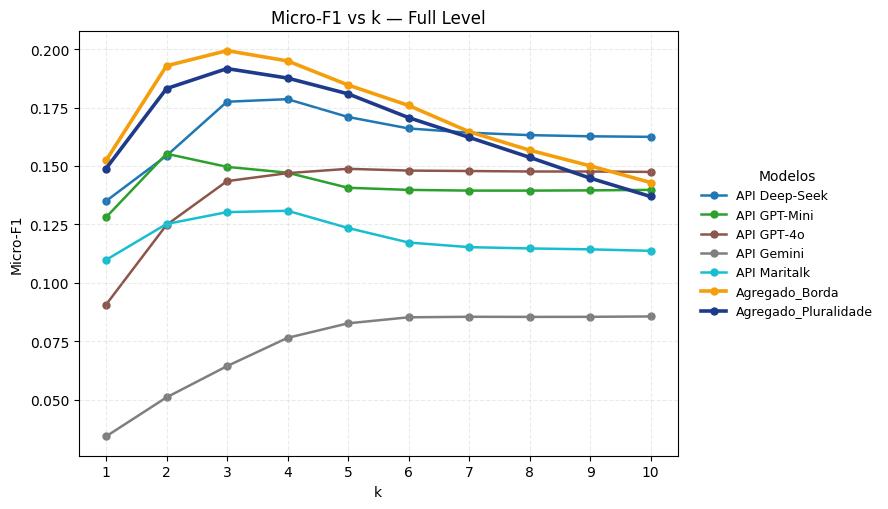

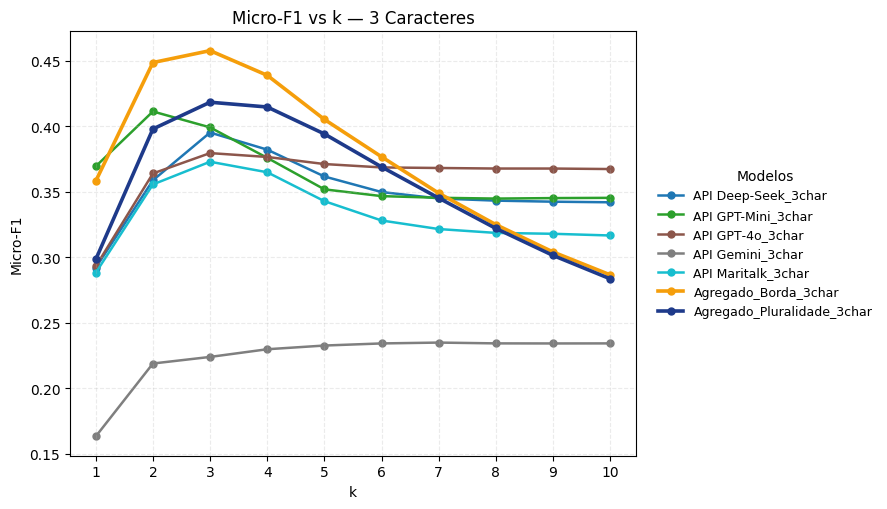

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# ==========================
# CONFIG — CORES E ESTILO
# ==========================
# Destaques
COR_AGREGADO = "#1E3A8A"   # azul escuro
COR_BORDA    = "#F59E0B"   # dourado/âmbar

# Paleta para os outros modelos (usando colormap)
CMAP_OUTROS = cm.get_cmap("tab10")  # pode testar "tab20", "viridis", etc.
LW_DESTAQUE = 2.6
LW_OUTROS   = 1.8
MS          = 5

def _plot_micro_f1_por_k(df_tipo, titulo):
    plt.figure(figsize=(9, 5.2))
    modelos = sorted(df_tipo["Modelo"].unique())

    # Contador para atribuir cores únicas aos "outros"
    outros_count = 0
    n_outros = sum(
        not (("agregado" in m.lower()) or ("borda" in m.lower()))
        for m in modelos
    )

    for modelo in modelos:
        sub = df_tipo[df_tipo["Modelo"] == modelo].sort_values("k")
        if sub.empty:
            continue

        nome_lower = modelo.lower()
        if ("agregado" in nome_lower) and ("borda" in nome_lower):
            cor = COR_BORDA
            lw  = LW_DESTAQUE
            z   = 3
        elif "agregado" in nome_lower:
            cor = COR_AGREGADO
            lw  = LW_DESTAQUE
            z   = 3
        elif "borda" in nome_lower:
            cor = COR_BORDA
            lw  = LW_DESTAQUE
            z   = 3
        else:
            # distribui cores da paleta para os outros
            cor = CMAP_OUTROS(outros_count / max(1, n_outros - 1))
            lw  = LW_OUTROS
            z   = 1
            outros_count += 1

        plt.plot(
            sub["k"], sub["Micro_F1"],
            marker="o",
            linewidth=lw,
            markersize=MS,
            label=modelo,
            color=cor,
            zorder=z
        )

    plt.xticks(range(1, 11))
    plt.xlabel("k")
    plt.ylabel("Micro-F1")
    plt.title(titulo)
    plt.grid(True, alpha=0.25, linestyle="--", linewidth=0.8)

    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        title="Modelos",
        fontsize=9
    )
    plt.tight_layout()

# ==========================
# PLOTS
# ==========================
df_full = df_resultados_completos[df_resultados_completos["Tipo"] == "Full Level"]
_plot_micro_f1_por_k(df_full, "Micro-F1 vs k — Full Level")

df_3char = df_resultados_completos[df_resultados_completos["Tipo"] == "3 Caracteres"]
_plot_micro_f1_por_k(df_3char, "Micro-F1 vs k — 3 Caracteres")

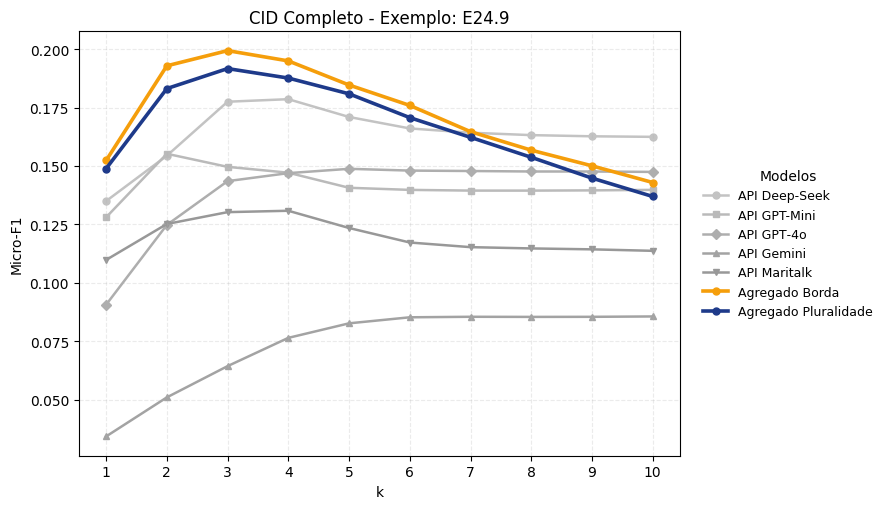

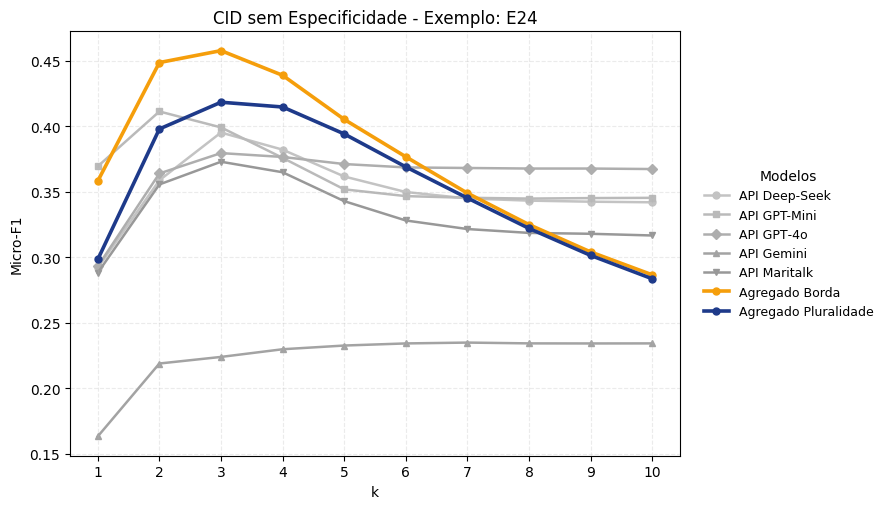

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import re

# ==========================
# CONFIG — CORES E ESTILO
# ==========================
COR_AGREGADO = "#1E3A8A"   # azul escuro
COR_BORDA    = "#F59E0B"   # dourado/âmbar
TONS_CINZA   = [cm.Greys(i) for i in np.linspace(0.35, 0.75, 12)]

# Marcadores diferentes para os "outros"
MARCADORES = ["o", "s", "D", "^", "v", "<", ">", "p", "h", "X", "*"]

LW_DESTAQUE = 2.6
LW_OUTROS   = 1.8
MS          = 5

def _nome_limpo(modelo: str) -> str:
    return re.sub(r'(_3char|_Full|_full|_3CHAR)$', '', modelo).replace('_', ' ')

def _plot_micro_f1_por_k(df_tipo, titulo, out_prefix=None, show=True):
    fig, ax = plt.subplots(figsize=(9, 5.2))
    modelos = sorted(df_tipo["Modelo"].unique())

    outros_count = 0
    for modelo in modelos:
        sub = df_tipo[df_tipo["Modelo"] == modelo].sort_values("k")
        if sub.empty:
            continue

        nome_lower   = modelo.lower()
        nome_legenda = _nome_limpo(modelo)

        if ("agregado" in nome_lower) and ("borda" in nome_lower):
            cor, lw, z, marker = COR_BORDA, LW_DESTAQUE, 3, "o"
        elif "agregado" in nome_lower:
            cor, lw, z, marker = COR_AGREGADO, LW_DESTAQUE, 3, "o"
        elif "borda" in nome_lower:
            cor, lw, z, marker = COR_BORDA, LW_DESTAQUE, 3, "o"
        else:
            cor    = TONS_CINZA[outros_count % len(TONS_CINZA)]
            marker = MARCADORES[outros_count % len(MARCADORES)]
            lw, z  = LW_OUTROS, 1
            outros_count += 1

        ax.plot(
            sub["k"], sub["Micro_F1"],
            marker=marker,
            linewidth=lw,
            markersize=MS,
            label=nome_legenda,
            color=cor,
            zorder=z
        )

    ax.set_xticks(range(1, 11))
    ax.set_xlabel("k")
    ax.set_ylabel("Micro-F1")
    ax.set_title(titulo)
    ax.grid(True, alpha=0.25, linestyle="--", linewidth=0.8)

    leg = ax.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        title="Modelos",
        fontsize=9
    )

    fig.tight_layout()

    # salva dentro da função (garante que salva a figura certa)
    if out_prefix:
        fig.savefig(f"{out_prefix}.png", dpi=600, bbox_inches="tight")
        fig.savefig(f"{out_prefix}.pdf", dpi=600, bbox_inches="tight")

    if show:
        plt.show()

    plt.close(fig)  # evita acumular figuras em memória

# ==========================
# PLOTS
# ==========================
df_full  = df_resultados_completos[df_resultados_completos["Tipo"] == "Full Level"]
_plot_micro_f1_por_k(df_full, "CID Completo - Exemplo: E24.9", out_prefix="microf1_full_level", show=True)

df_3char = df_resultados_completos[df_resultados_completos["Tipo"] == "3 Caracteres"]
_plot_micro_f1_por_k(df_3char, "CID sem Especificidade - Exemplo: E24", out_prefix="microf1_3caracteres", show=True)



In [ ]:
# ==========================
# PATCH: tons de cinza mais distintos + estilos redundantes
# ==========================
import matplotlib.patheffects as pe

# Gerador de tons de cinza bem espaçados (evita extremos e proximidades)
def gerar_tons_cinza_distintos(n):
    cmap = cm.get_cmap('Greys_r')  # invertido: tons crescem do claro p/ escuro
    xs = np.linspace(0.15, 0.85, n)  # evita 0.0 e 1.0 (quase branco/preto)
    # reordena para alternar claro/escuro e maximizar contraste entre vizinhos
    ordem = np.ravel(np.column_stack([xs[::2], xs[1::2]])).tolist() if n > 2 else xs
    xs_ord = ordem[:n] if isinstance(ordem, list) else xs
    return [cmap(x) for x in xs_ord]

# Marcadores/linhas para diferenciar mesmo quando as cores são parecidas
MARCADORES  = ["o", "s", "^", "D", "v", ">", "<", "P", "X", "*", "h", "8"]
LINHASTYLES = ["-", "--", "-.", ":"]

def _luminancia_rgba(rgba):
    r, g, b, _ = rgba
    # luminância aproximada sRGB
    return 0.2126*r + 0.7152*g + 0.0722*b

def _plot_micro_f1_por_k(df_tipo, titulo):
    plt.figure(figsize=(9, 5.2))
    modelos = sorted(df_tipo["Modelo"].unique())

    # quantos "outros" teremos?
    n_outros = sum(
        not(("agregado" in m.lower()) or ("borda" in m.lower()))
        for m in modelos
    )
    tons_outros = gerar_tons_cinza_distintos(max(n_outros, 1))

    outros_idx = 0
    for i, modelo in enumerate(modelos):
        sub = df_tipo[df_tipo["Modelo"] == modelo].sort_values("k")
        if sub.empty:
            continue

        nome_lower = modelo.lower()
        nome_legenda = _nome_limpo(modelo)

        # destaque p/ Agregado/Borda
        if ("agregado" in nome_lower) and ("borda" in nome_lower):
            cor, lw, z, ls, mk = COR_BORDA, LW_DESTAQUE, 4, "-", "o"
        elif "agregado" in nome_lower:
            cor, lw, z, ls, mk = COR_AGREGADO, LW_DESTAQUE, 4, "-", "o"
        elif "borda" in nome_lower:
            cor, lw, z, ls, mk = COR_BORDA, LW_DESTAQUE, 4, "-", "o"
        else:
            cor = tons_outros[outros_idx % len(tons_outros)]
            ls  = LINHASTYLES[outros_idx % len(LINHASTYLES)]
            mk  = MARCADORES[outros_idx % len(MARCADORES)]
            lw, z = LW_OUTROS, 2
            outros_idx += 1

        # contorno branco/preto para aumentar contraste do marcador
        edge = "black" if _luminancia_rgba(cor) > 0.6 else "white"

        # halo na linha para separar sobreposições
        efeitos = [pe.Stroke(linewidth=lw+1.2, foreground="white"), pe.Normal()]

        plt.plot(
            sub["k"], sub["Micro_F1"],
            marker=mk,
            linewidth=lw,
            markersize=MS,
            label=nome_legenda,
            color=cor,
            linestyle=ls,
            zorder=z,
            path_effects=efeitos
        )
        plt.scatter(
            sub["k"], sub["Micro_F1"],
            s=MS**2 * 0.6,
            facecolor=cor,
            edgecolor=edge,
            linewidth=0.9,
            zorder=z+1
        )

    plt.xticks(range(1, 11))
    plt.xlabel("k")
    plt.ylabel("Micro-F1")
    plt.title(titulo)
    plt.grid(True, alpha=0.25, linestyle="--", linewidth=0.8)

    plt.legend(
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),
        frameon=False,
        title="Modelos",
        fontsize=9
    )
    plt.tight_layout()


In [ ]:
import pandas as pd
import ipywidgets as widgets
from IPython.display import display, clear_output


# --- 2. Definição da Função de Exibição ---
# Esta função será chamada toda vez que um widget for alterado.
def exibir_tabela_filtrada(tipo, k):
    # Limpa a saída anterior para não acumular tabelas
    clear_output(wait=True)

    # Filtra o DataFrame com base nos valores dos widgets
    df_filtrado = df_resultados_completos[
        (df_resultados_completos['Tipo'] == tipo) &
        (df_resultados_completos['k'] == k)
    ]

    # Ordena os resultados pela coluna 'Micro_F1'
    df_ordenado = df_filtrado.sort_values(by='Micro_F1', ascending=False)

    # Exibe o DataFrame resultante
    print(f"Exibindo resultados para Tipo='{tipo}' e k={k}")
    display(df_ordenado)

# --- 3. Criação e Configuração dos Widgets ---
# Extrai as opções únicas do próprio DataFrame para os widgets
tipos_disponiveis = df_resultados_completos['Tipo'].unique()
k_min = int(df_resultados_completos['k'].min())
k_max = int(df_resultados_completos['k'].max())

# Cria o widget de menu suspenso para o 'Tipo'
tipo_widget = widgets.Dropdown(
    options=tipos_disponiveis,
    value=tipos_disponiveis[0],
    description='Tipo:',
    disabled=False,
)

# Cria o controle deslizante para o 'k'
k_widget = widgets.IntSlider(
    min=k_min,
    max=k_max,
    step=1,
    value=k_min,
    description='Valor de k:',
    continuous_update=False # Evita que a tabela atualize enquanto arrasta
)

# --- 4. Execução da Interface Interativa ---
# A função 'interactive' conecta os widgets à função de exibição
ui = widgets.interactive(exibir_tabela_filtrada, tipo=tipo_widget, k=k_widget)

# Exibe os controles e a primeira saída
display(ui)

interactive(children=(Dropdown(description='Tipo:', options=('Full Level', '3 Caracteres'), value='Full Level'…

In [ ]:
import pandas as pd

# ---- normalização do nível/tipo ----
def _norm_tipo(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.lower().str.strip()
    s = (s.replace({
        "full": "full",
        "completo": "full",
        "complete": "full",
        "3char": "3char",
        "3-char": "3char",
        "tres caracteres": "3char",
        "três caracteres": "3char",
        "3 caracteres": "3char"
    }))
    s = s.where(~s.str.contains(r"full|complet", na=False), "full")
    s = s.where(~s.str.contains(r"3\s*char|tr[eê]s\s*carac|3\s*carac", na=False), "3char")
    return s

df = df_resultados_completos.copy()
df["__nivel__"] = _norm_tipo(df["Tipo"])

# (opcional) se existir coluna Modelo, ela entra como índice
tem_modelo = "Modelo" in df.columns
idx_cols = ["Modelo"] if tem_modelo else []

def prepara_tabela(df_nivel):
    cols = idx_cols + ["k", "Micro_F1"]
    base = df_nivel[cols].copy()
    if idx_cols:
        tabela = base.pivot_table(index=idx_cols, columns="k", values="Micro_F1", aggfunc="max")
    else:
        tabela = base.pivot_table(index=None, columns="k", values="Micro_F1", aggfunc="max")
    return tabela.round(5).sort_index(axis=1)

# cria as duas tabelas
tabela_full  = prepara_tabela(df[df["__nivel__"] == "full"])
tabela_3char = prepara_tabela(df[df["__nivel__"] == "3char"])

# salva no Excel em duas abas
with pd.ExcelWriter("Resultados_MicroF1.xlsx", engine="openpyxl") as writer:
    tabela_full.to_excel(writer, sheet_name="FULL")
    tabela_3char.to_excel(writer, sheet_name="3CHAR")

print("Arquivo 'Resultados_MicroF1.xlsx' salvo com sucesso!")


Arquivo 'Resultados_MicroF1.xlsx' salvo com sucesso!
